In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from corner import corner
import model_b2 as model
import emcee
from multiprocess import Pool
from scipy import stats
import scienceplots
plt.style.use('science')

In [2]:
os.environ['OMP_NUM_THREADS'] = '1'

In [4]:
backend = emcee.backends.HDFBackend('model_2.h5')

In [7]:
lnp = backend.get_log_prob()

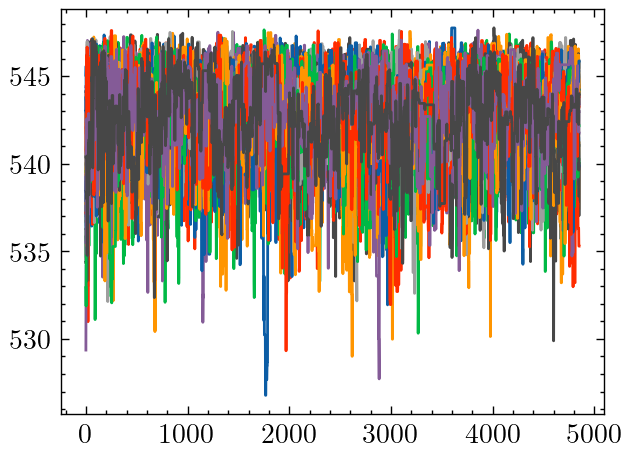

In [13]:
nb = 150
min_lnp = 525

good_walkers = np.where(np.min(lnp[nb:], axis=0) > min_lnp)[0]

fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot(lnp[nb:, good_walkers]);

In [15]:
chain = backend.get_chain(discard=nb)[:, good_walkers, :]

In [16]:
chain.shape

(4850, 27, 16)

In [17]:
nt = int(np.round(np.max(emcee.autocorr.integrated_time(chain))))

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 97;
tau: [ 62.58165837  50.38919414 170.98498536 161.79388949 162.00114488
  46.89560148  48.77699079  69.93375523  53.0477674  133.97190967
  44.4398947   47.72505085  44.55103401  46.95376369  48.48896589
  50.79043407]

In [20]:
nt = 50
nd = model.azr.config.nd

In [21]:
flat_chain = chain[::nt, :, :].reshape(-1, nd)

In [22]:
from corner import corner

In [23]:
nrpar = model.azr.config.n1

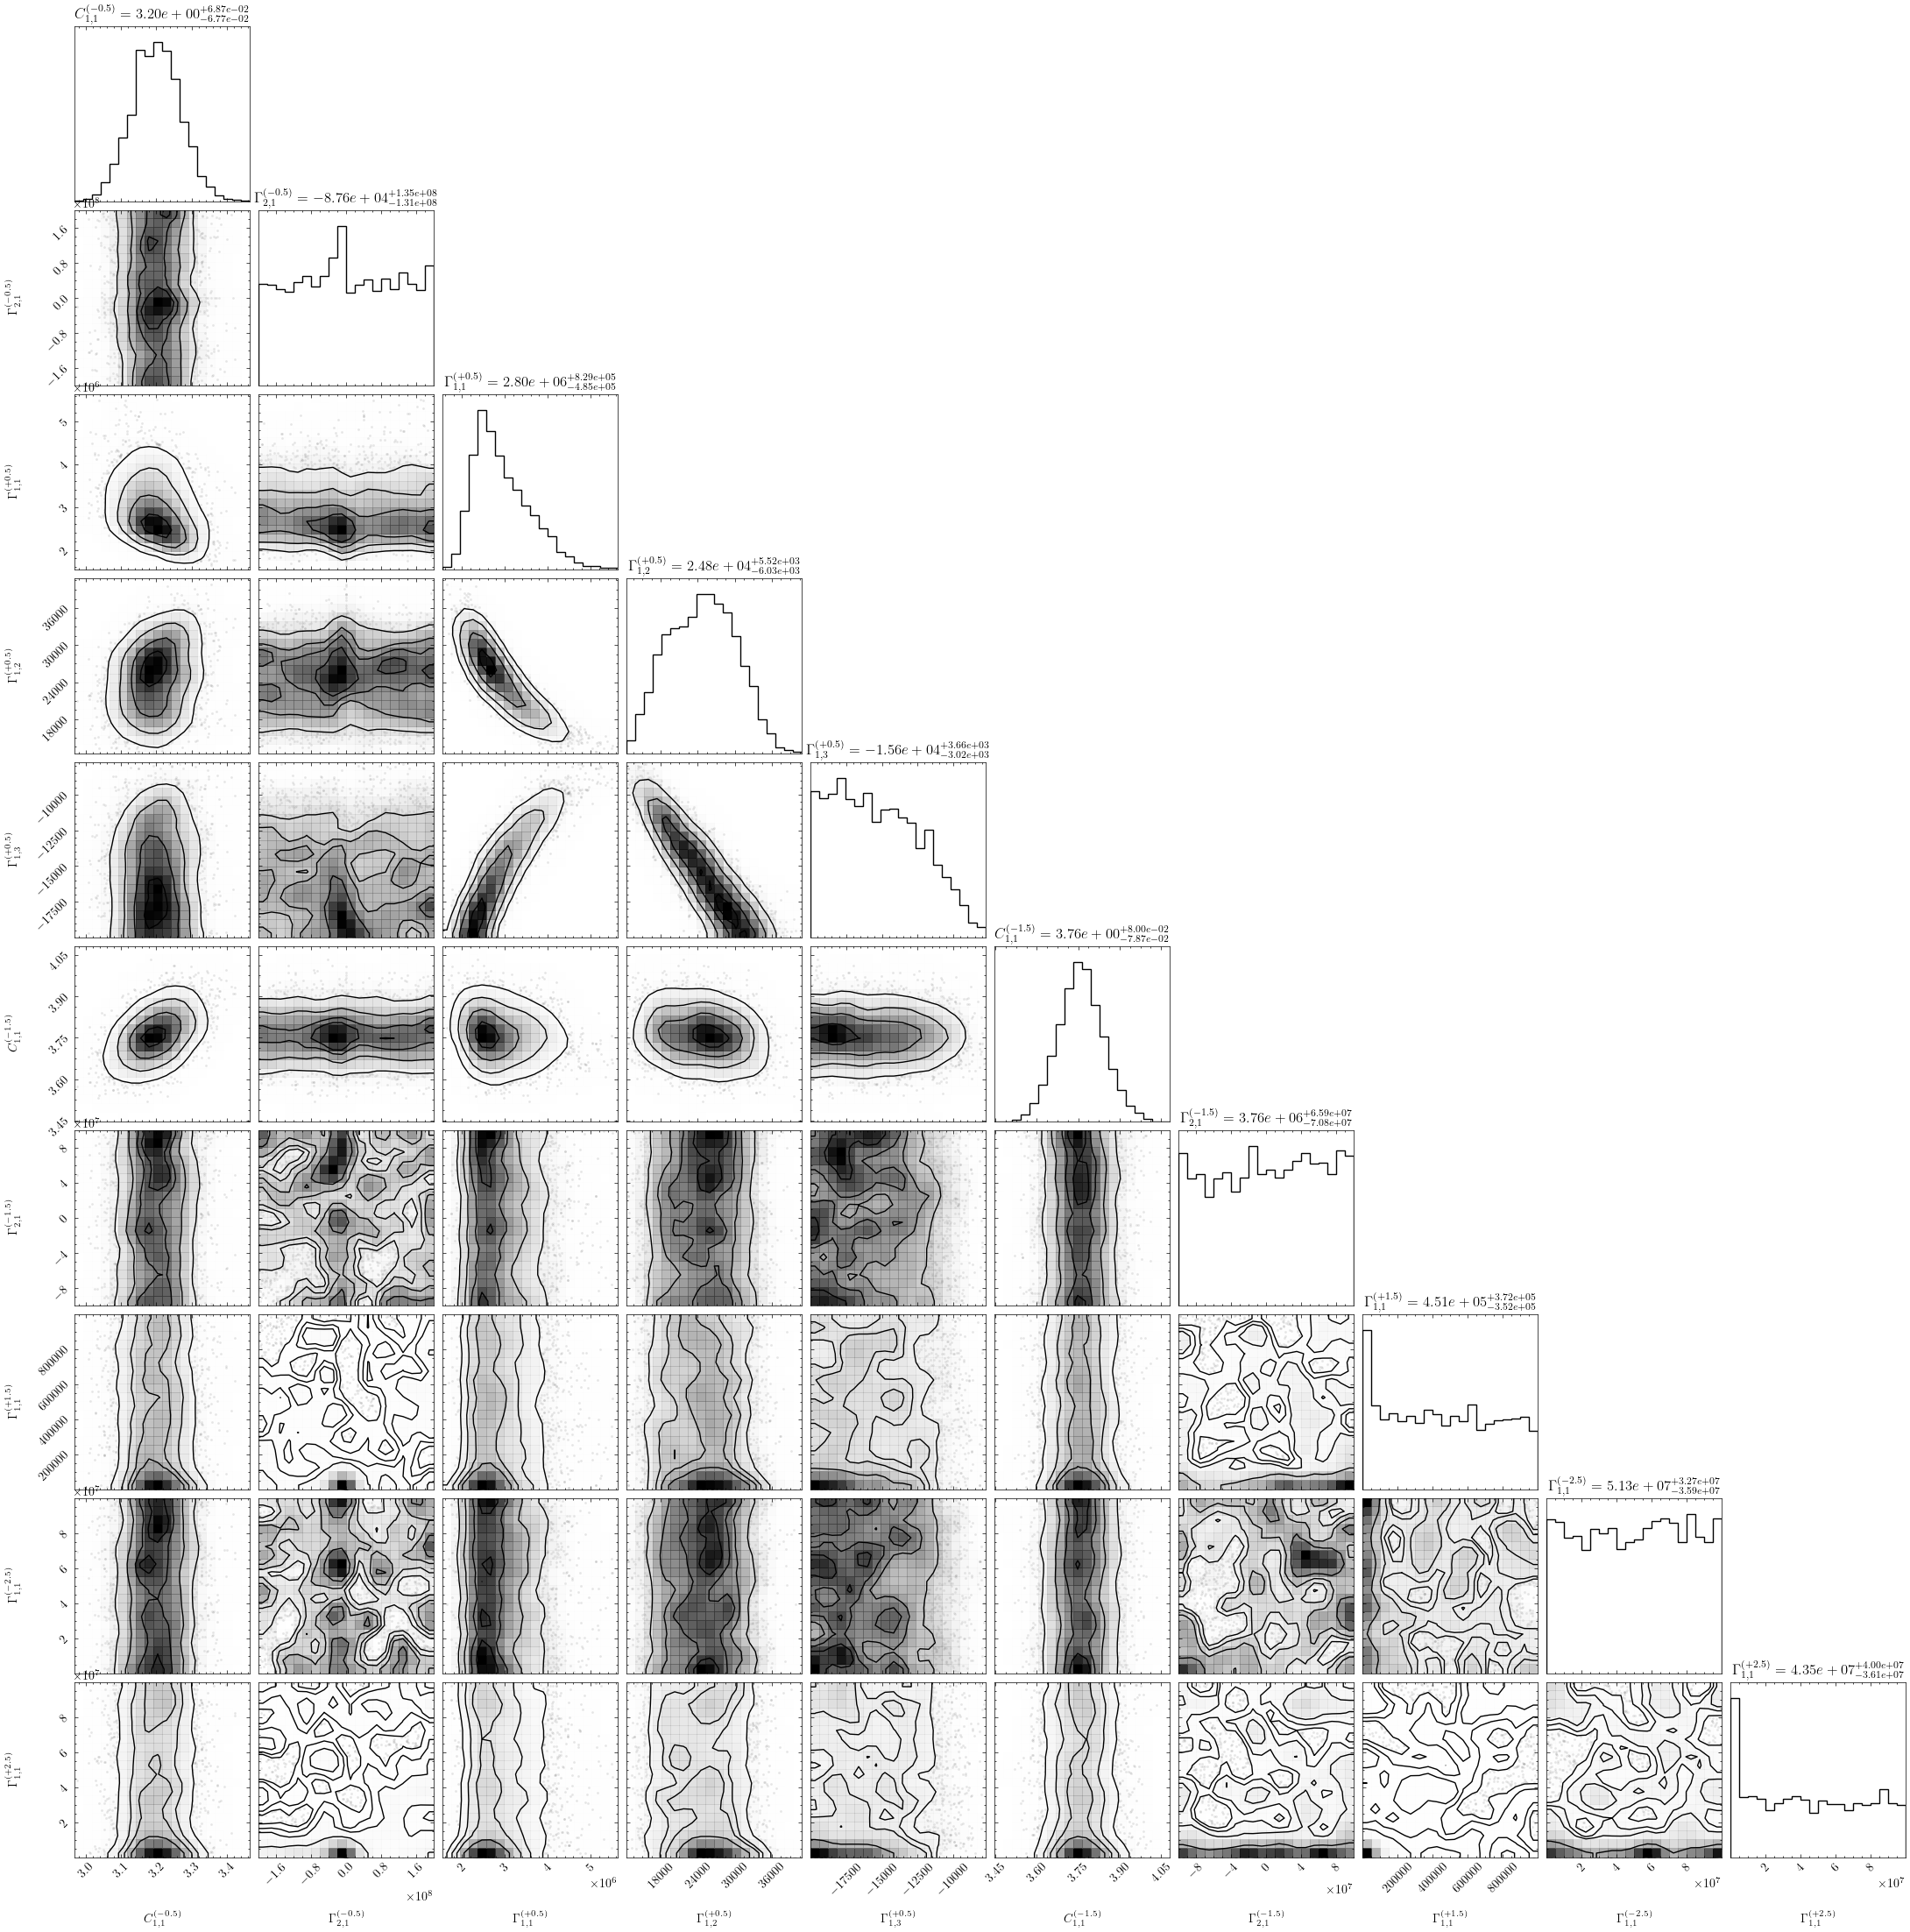

In [24]:
fig = corner(flat_chain[:, :nrpar], show_titles=True, smooth=True, labels=model.azr.config.labels[:nrpar],
             title_fmt='.2e')

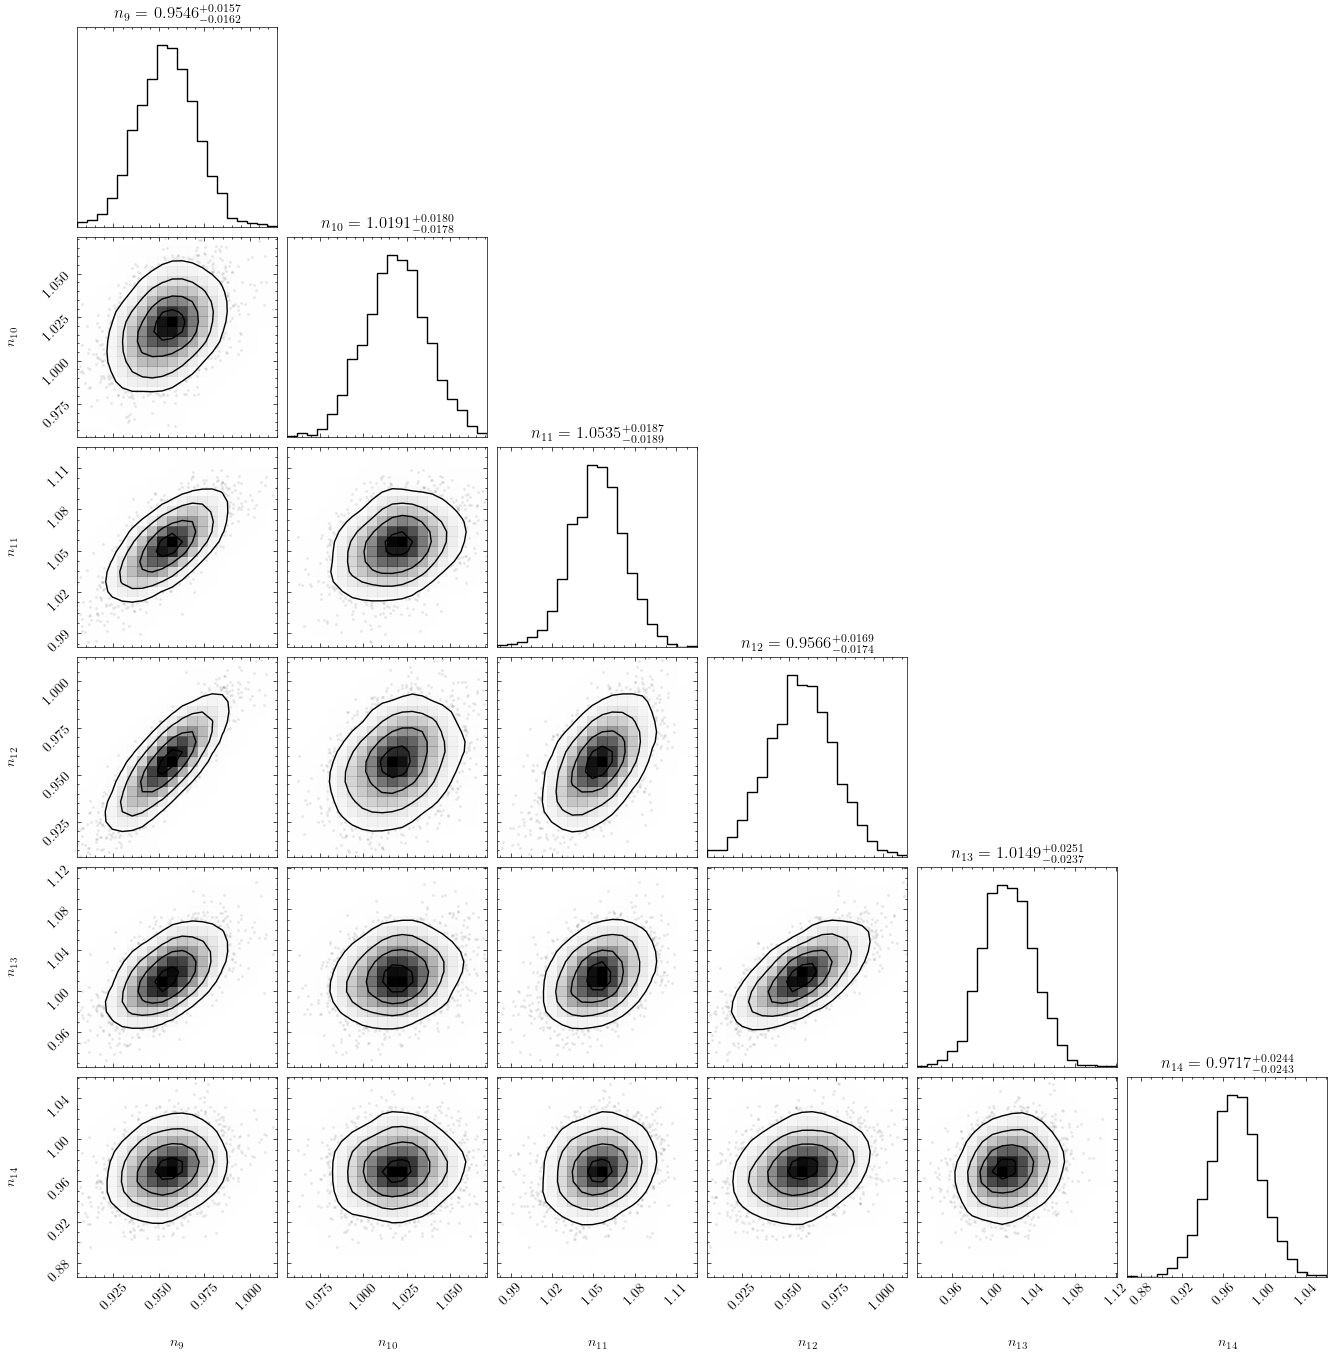

In [ ]:
fig = corner(flat_chain[:, nrpar:], show_titles=True, smooth=True, labels=model.azr.config.labels[nrpar:],
             title_fmt='.4f')

In [26]:
# np.save('model_b2.npy', flat_chain)

In [8]:
# files = ['AZUREOut_aa=1_R=1.out',
#          'AZUREOut_aa=1_R=2.out',
#          'AZUREOut_aa=1_TOTAL_CAPTURE.out']
# data = np.vstack([np.loadtxt('output/' + f) for f in files])
# np.savetxt('bare_uncertainties.txt', data[:, 6])

In [27]:
ii = np.argmax(lnp.flatten())

In [28]:
ii

133167

In [30]:
# theta_star = np.savetxt('theta_star_b2.txt', backend.get_chain(flat=True)[ii])